In [95]:
import Data.Histogram
import Data.Histogram.Fill
import Data.Histogram.Bin
import Prelude 
import Data.Vector.Unboxed (fromList, Unbox)

import Control.Monad.Bayes.Class
import Control.Monad.Bayes.Enumerator
import Control.Monad.Bayes.Weighted
import Control.Monad.Bayes.Sampler.Strict
import Control.Monad

:l ../Plotting.hs


In [99]:
histogram :: (Foldable v) =>
         Int
      -> v Double
      -> [(Double, Double)]
histogram n v = asList $ fillBuilder buildr v
  where
    mi = Prelude.minimum v
    ma = Prelude.maximum v
    bins = binD mi n ma
    buildr = mkSimple bins

In [100]:
-- toHistogram 3 [1,2,2]

In [112]:
model :: MonadSample m => m Double
model = do
    x <- bernoulli 0.5
    normal (if x then 0 else 1) 1
    
image :: MonadSample m => m Plot
image = fmap (plot . histogram 100) (replicateM 100000 model)


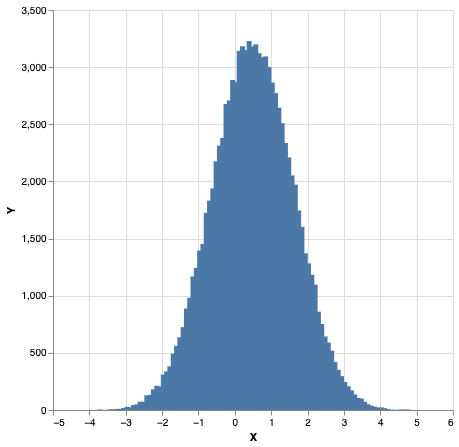

In [113]:
sampler image